In [1]:
import hcp_utils as hcp
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import nascar_utility
import sys
import matplotlib.gridspec as gridspec
from PIL import Image
from scipy import stats
from scipy.stats import ttest_ind

# sns.set("paper", "white")
# #%matplotlib inline
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['figure.facecolor'] = 'white'
sys.path.insert(0, '/om2/scratch/Fri/jsmentch/nat_img/code')

# Import the function from the file
import utility

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


## first take a look at how the features are between components

~-~-~- rest_run-1 -~-~-~
~-~-~- rest_run-2 -~-~-~
~-~-~- movieDM -~-~-~
~-~-~- movieTP -~-~-~


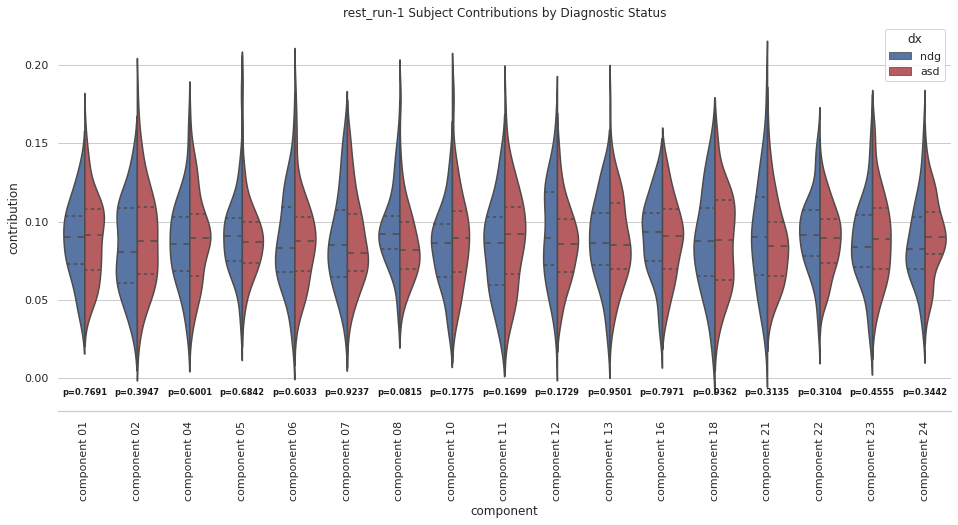

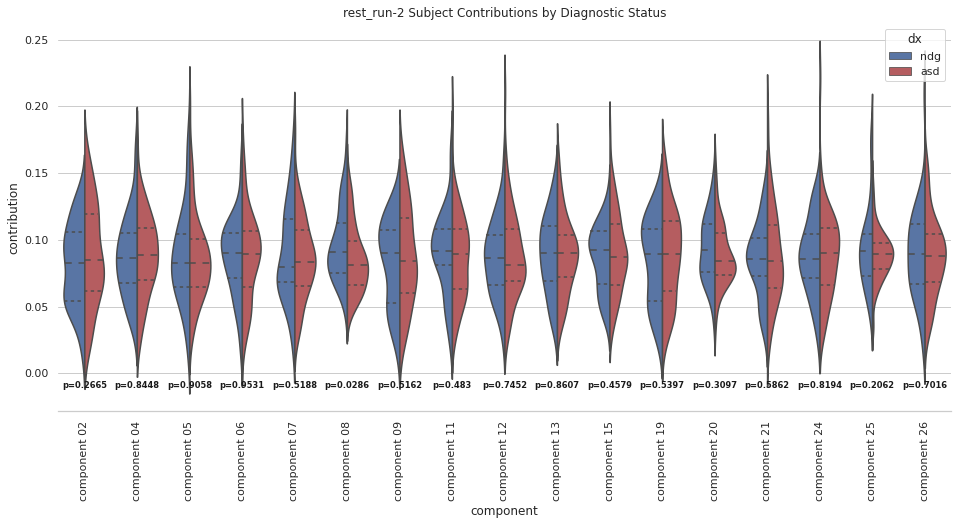

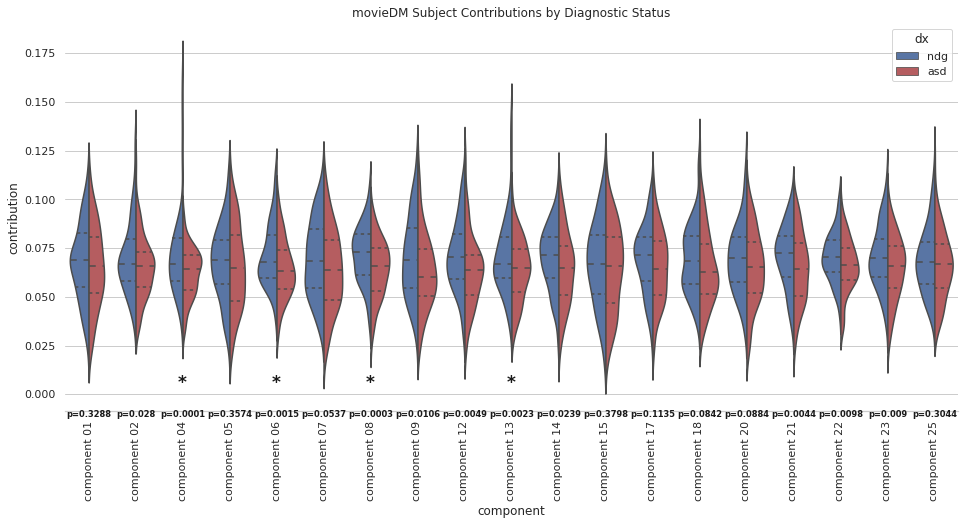

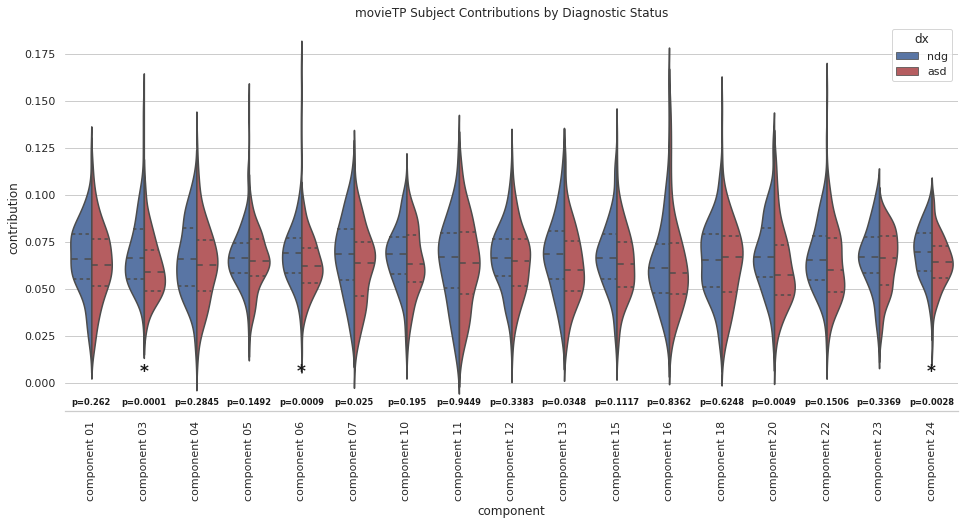

In [11]:
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]
    
    
    dx_list = [0 if x == 'ndg' else 1 if x == 'asd' else x for x in y]

    asc_ind=np.nonzero(dx_list)[0]
    td_ind=indices = [i for i, x in enumerate(dx_list) if x == 0]

    t_list=[]
    p_list=[]
    for component in component_list:
        i=component-1
        asc_contributions = contributions[:,i][asc_ind]
        td_contributions = contributions[:,i][td_ind]
        t,p=ttest_ind(asc_contributions, td_contributions)
        t_list.append(t)
        p_list.append(p)
    #bonferroni fwer correction
    p_bonferroni=[]
    sig_list=[]
    for i,p in enumerate(p_list):
        p_corrected=p*len(component_list)
        p_bonferroni.append(p_corrected)
        if p_corrected < 0.05:
            sig_list.append(i)
    column_list=[]
    for i in component_list:
        column_list.append(f'component {i:02d}')
    # df = pd.DataFrame(contributions_rest, columns=column_list)
    arr_df = pd.DataFrame(X, columns=[f'component {i:02d}' for i in component_list])

    # Concatenate the two DataFrames along the columns axis
    df = pd.concat([demos, arr_df], axis=1)

    df=pd.melt(df, id_vars=['subject','dx','age'], value_vars=column_list, var_name='component', value_name='contribution')


    plt.rcParams['figure.dpi'] = 72
    plt.rcParams['savefig.dpi'] = 72
    plt.figure(figsize=(16,7))

    sns.set_theme(style="whitegrid")
    #sns.set(font_scale=2)
    # Draw a nested violinplot and split the violins for easier comparison
    violinplot=sns.violinplot(data=df, x="component", y="contribution", hue="dx",
                   split=True, inner="quart", linewidth=1.5, palette={"ndg": "b", "asd": "r"})
    sns.despine(left=True)
    plt.xticks(rotation=90)


    #p_values = df.groupby(['component'])['contribution'].median()
    vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

    for xtick in violinplot.get_xticks():
        violinplot.text(xtick,-0.015 + vertical_offset, f'p={round(p_list[xtick],4)}', 
                horizontalalignment='center',size='x-small',color='k',weight='semibold')
    for xtick in sig_list:
        violinplot.text(xtick,0.0 + vertical_offset, f'*', 
                horizontalalignment='center',size='x-large',color='k',weight='bold')

    violinplot.set(title=f'{task} Subject Contributions by Diagnostic Status')
    
    plt.savefig(f'../outputs/figures/results/clinical/{task}_clinical.png',bbox_inches='tight')


~-~-~- rest_run-1 -~-~-~
~-~-~- rest_run-2 -~-~-~
~-~-~- movieDM -~-~-~
~-~-~- movieTP -~-~-~


<Figure size 1152x504 with 0 Axes>

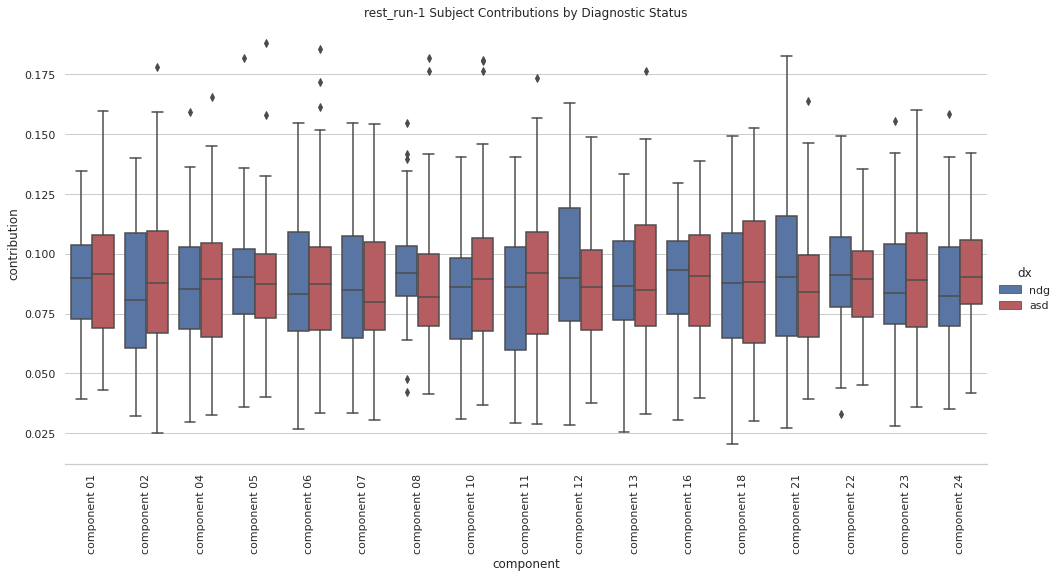

<Figure size 1152x504 with 0 Axes>

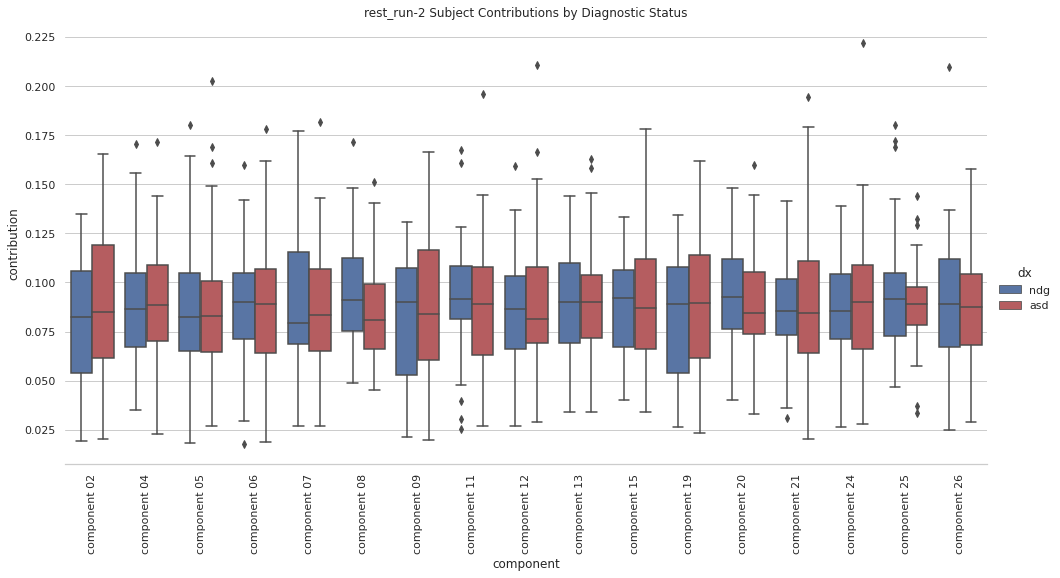

<Figure size 1152x504 with 0 Axes>

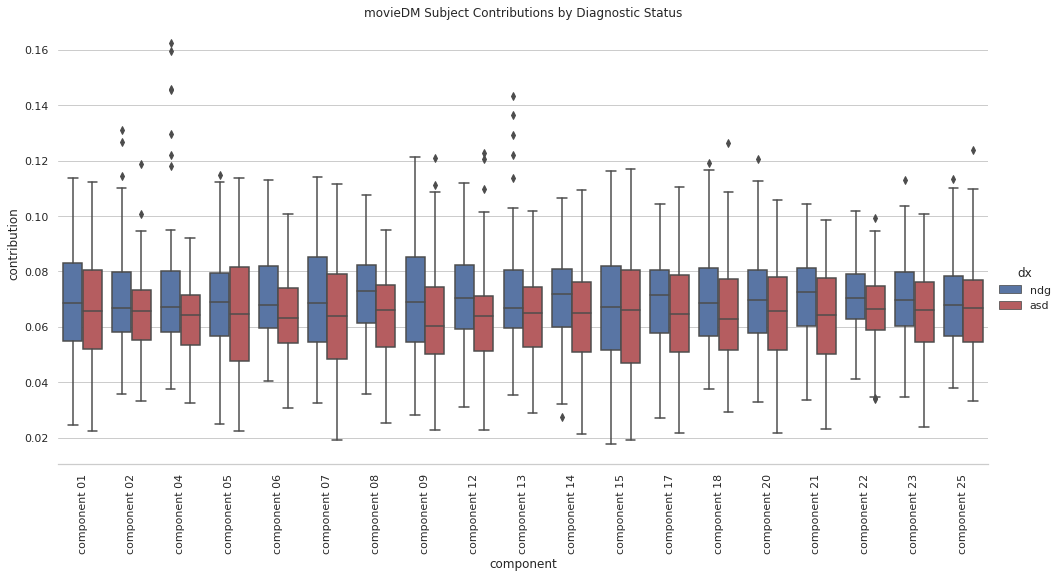

<Figure size 1152x504 with 0 Axes>

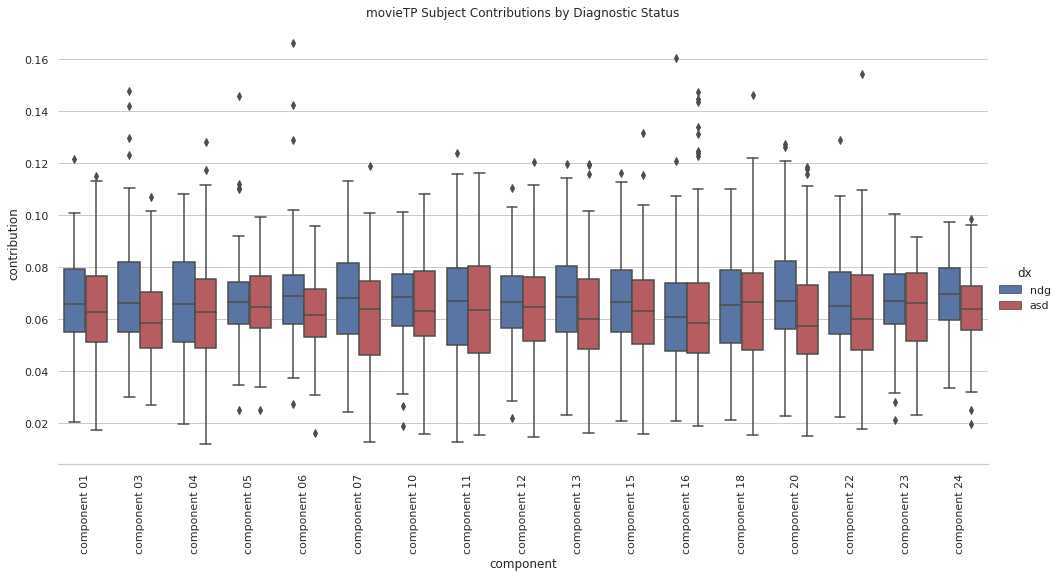

In [14]:
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]
    
    
    dx_list = [0 if x == 'ndg' else 1 if x == 'asd' else x for x in y]

    asc_ind=np.nonzero(dx_list)[0]
    td_ind=indices = [i for i, x in enumerate(dx_list) if x == 0]

    t_list=[]
    p_list=[]
    for component in component_list:
        i=component-1
        asc_contributions = contributions[:,i][asc_ind]
        td_contributions = contributions[:,i][td_ind]
        t,p=ttest_ind(asc_contributions, td_contributions)
        t_list.append(t)
        p_list.append(p)
    #bonferroni fwer correction
    p_bonferroni=[]
    sig_list=[]
    for i,p in enumerate(p_list):
        p_corrected=p*len(component_list)
        p_bonferroni.append(p_corrected)
        if p_corrected < 0.05:
            sig_list.append(i)
    column_list=[]
    for i in component_list:
        column_list.append(f'component {i:02d}')
    # df = pd.DataFrame(contributions_rest, columns=column_list)
    arr_df = pd.DataFrame(X, columns=[f'component {i:02d}' for i in component_list])

    # Concatenate the two DataFrames along the columns axis
    df = pd.concat([demos, arr_df], axis=1)

    df=pd.melt(df, id_vars=['subject','dx','age'], value_vars=column_list, var_name='component', value_name='contribution')

    plt.rcParams['figure.dpi'] = 72
    plt.rcParams['savefig.dpi'] = 72
    plt.figure(figsize=(16,7))

    sns.set_theme(style="whitegrid")
    #sns.set(font_scale=2)
    # Draw a nested violinplot and split the violins for easier comparison
    violinplot=sns.catplot(data=df, x="component", y="contribution", hue="dx",
                   kind="box", linewidth=1.5, palette={"ndg": "b", "asd": "r"},height=7,aspect=2)
    sns.despine(left=True)
    plt.xticks(rotation=90)


    #p_values = df.groupby(['component'])['contribution'].median()
    vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

    # for xtick in violinplot.get_xticks():
    #     violinplot.text(xtick,-0.015 + vertical_offset, f'p={round(p_list[xtick],4)}', 
    #             horizontalalignment='center',size='x-small',color='k',weight='semibold')
    # for xtick in sig_list:
    #     violinplot.text(xtick,0.0 + vertical_offset, f'*', 
    #             horizontalalignment='center',size='x-large',color='k',weight='bold')

    violinplot.set(title=f'{task} Subject Contributions by Diagnostic Status')
    
    plt.savefig(f'../outputs/figures/results/clinical/{task}_clinical_box.png',bbox_inches='tight')


~-~-~- rest_run-1 -~-~-~
~-~-~- rest_run-2 -~-~-~
~-~-~- movieDM -~-~-~
~-~-~- movieTP -~-~-~


<Figure size 1152x504 with 0 Axes>

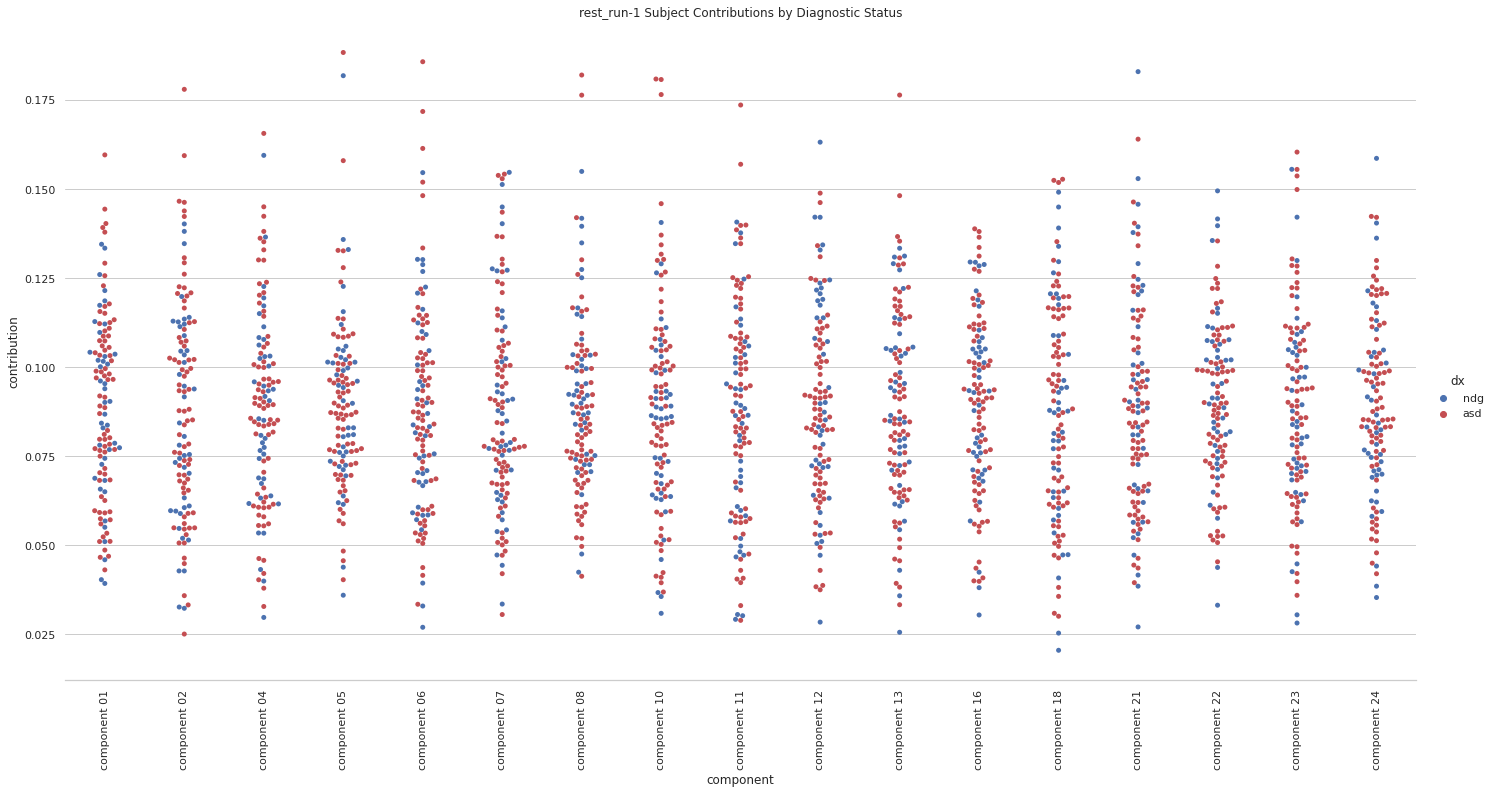

<Figure size 1152x504 with 0 Axes>

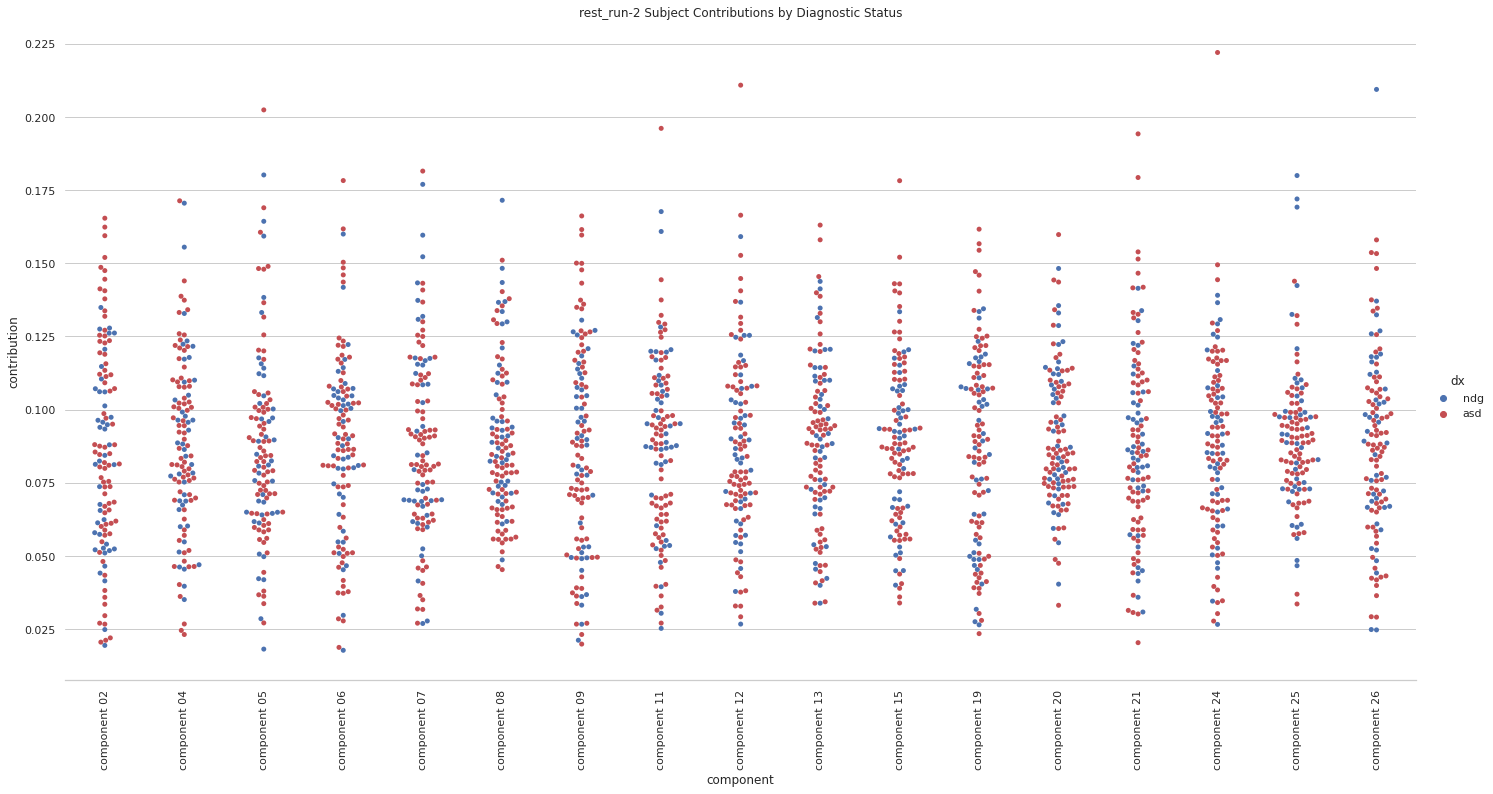

<Figure size 1152x504 with 0 Axes>

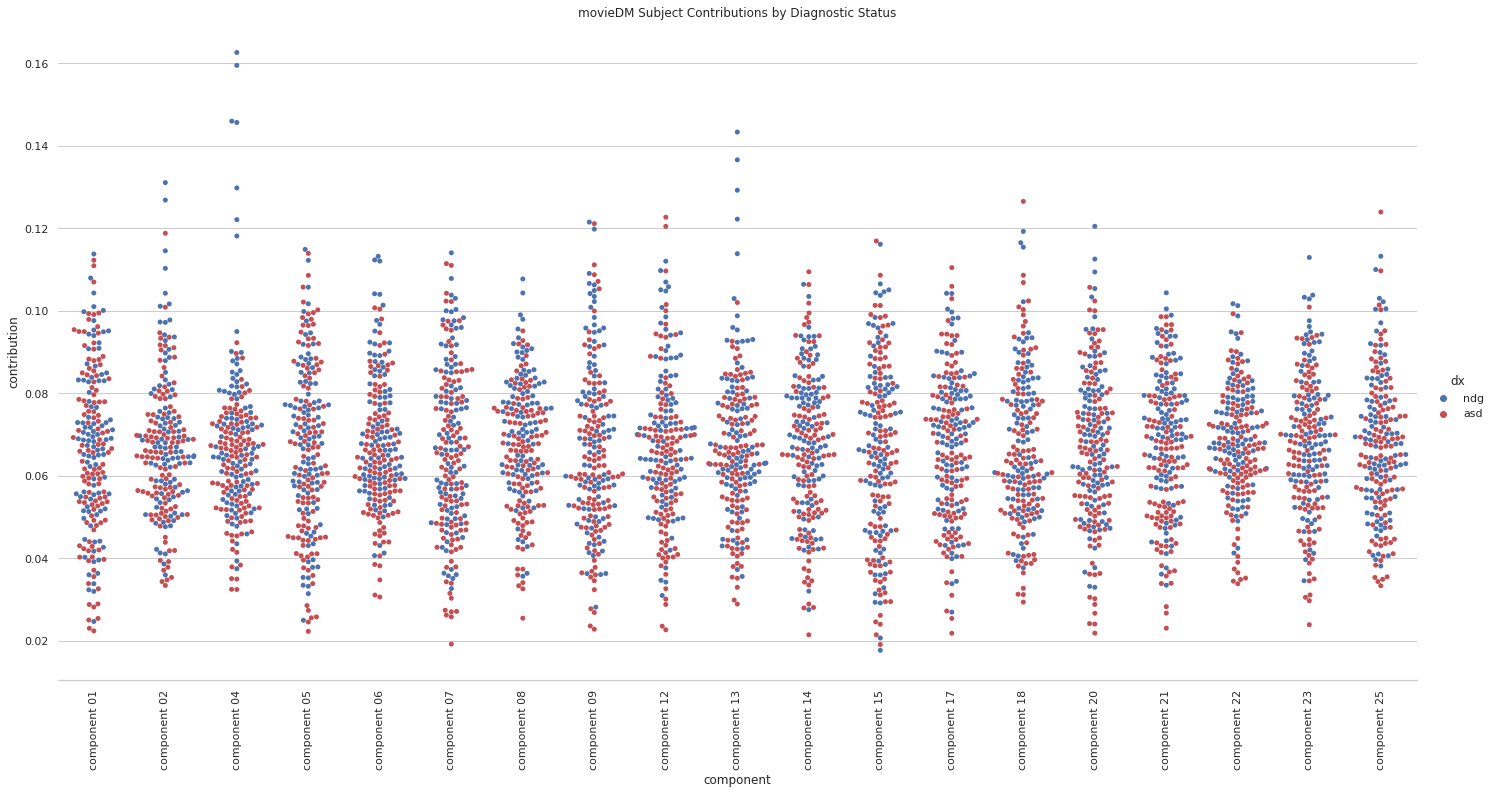

<Figure size 1152x504 with 0 Axes>

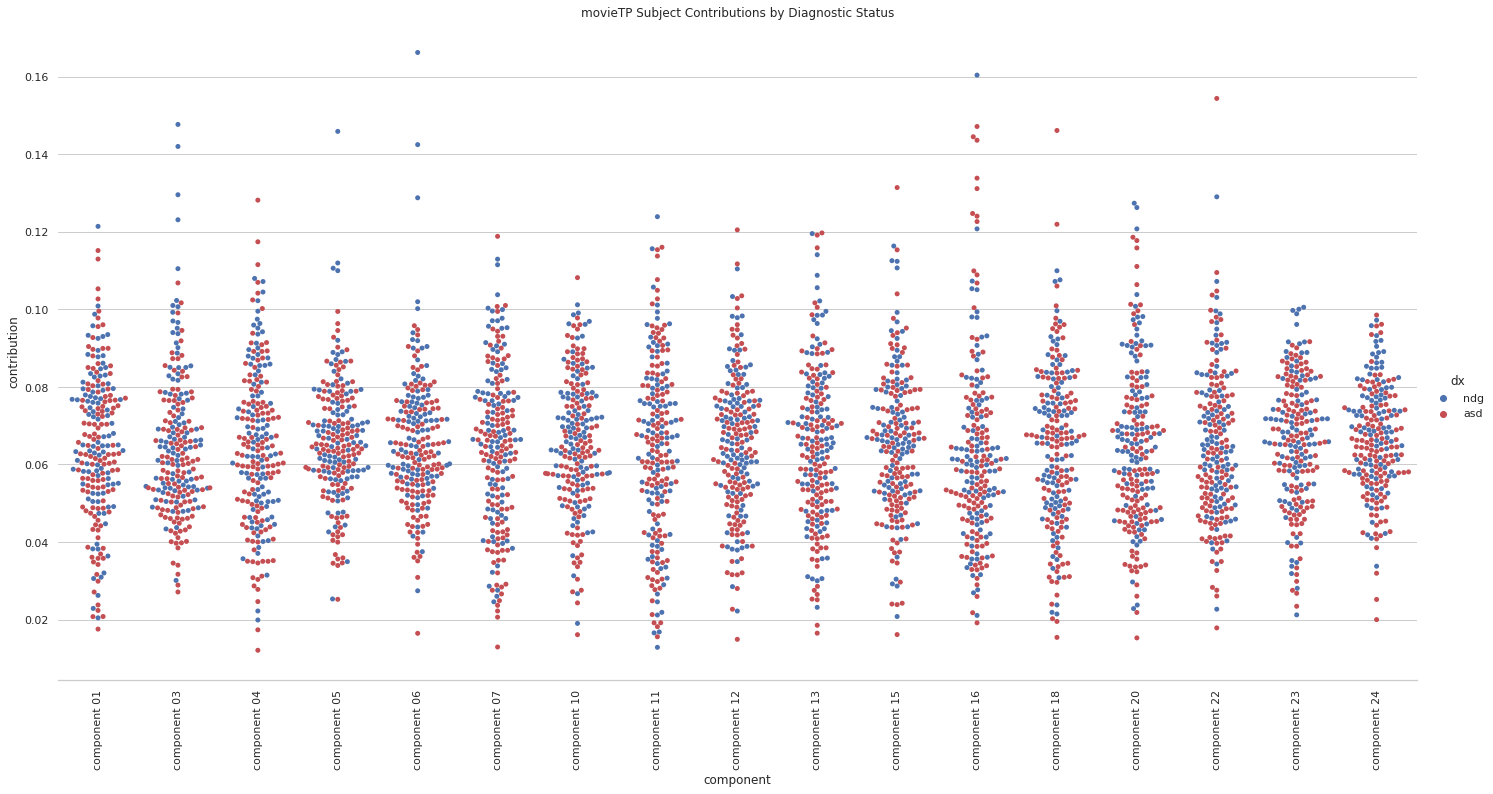

In [17]:
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]
    
    
    dx_list = [0 if x == 'ndg' else 1 if x == 'asd' else x for x in y]

    asc_ind=np.nonzero(dx_list)[0]
    td_ind=indices = [i for i, x in enumerate(dx_list) if x == 0]

    t_list=[]
    p_list=[]
    for component in component_list:
        i=component-1
        asc_contributions = contributions[:,i][asc_ind]
        td_contributions = contributions[:,i][td_ind]
        t,p=ttest_ind(asc_contributions, td_contributions)
        t_list.append(t)
        p_list.append(p)
    #bonferroni fwer correction
    p_bonferroni=[]
    sig_list=[]
    for i,p in enumerate(p_list):
        p_corrected=p*len(component_list)
        p_bonferroni.append(p_corrected)
        if p_corrected < 0.05:
            sig_list.append(i)
    column_list=[]
    for i in component_list:
        column_list.append(f'component {i:02d}')
    # df = pd.DataFrame(contributions_rest, columns=column_list)
    arr_df = pd.DataFrame(X, columns=[f'component {i:02d}' for i in component_list])

    # Concatenate the two DataFrames along the columns axis
    df = pd.concat([demos, arr_df], axis=1)

    df=pd.melt(df, id_vars=['subject','dx','age'], value_vars=column_list, var_name='component', value_name='contribution')

    plt.rcParams['figure.dpi'] = 72
    plt.rcParams['savefig.dpi'] = 72
    plt.figure(figsize=(16,7))

    sns.set_theme(style="whitegrid")
    #sns.set(font_scale=2)
    # Draw a nested violinplot and split the violins for easier comparison
    violinplot=sns.catplot(data=df, x="component", y="contribution", hue="dx",
                   kind="swarm", palette={"ndg": "b", "asd": "r"},height=10,aspect=2)
    sns.despine(left=True)
    plt.xticks(rotation=90)


    #p_values = df.groupby(['component'])['contribution'].median()
    vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

    # for xtick in violinplot.get_xticks():
    #     violinplot.text(xtick,-0.015 + vertical_offset, f'p={round(p_list[xtick],4)}', 
    #             horizontalalignment='center',size='x-small',color='k',weight='semibold')
    # for xtick in sig_list:
    #     violinplot.text(xtick,0.0 + vertical_offset, f'*', 
    #             horizontalalignment='center',size='x-large',color='k',weight='bold')

    violinplot.set(title=f'{task} Subject Contributions by Diagnostic Status')
    
    plt.savefig(f'../outputs/figures/results/clinical/{task}_swarm_box.png',bbox_inches='tight')


~-~-~- rest_run-1 -~-~-~
~-~-~- rest_run-2 -~-~-~
~-~-~- movieDM -~-~-~
~-~-~- movieTP -~-~-~


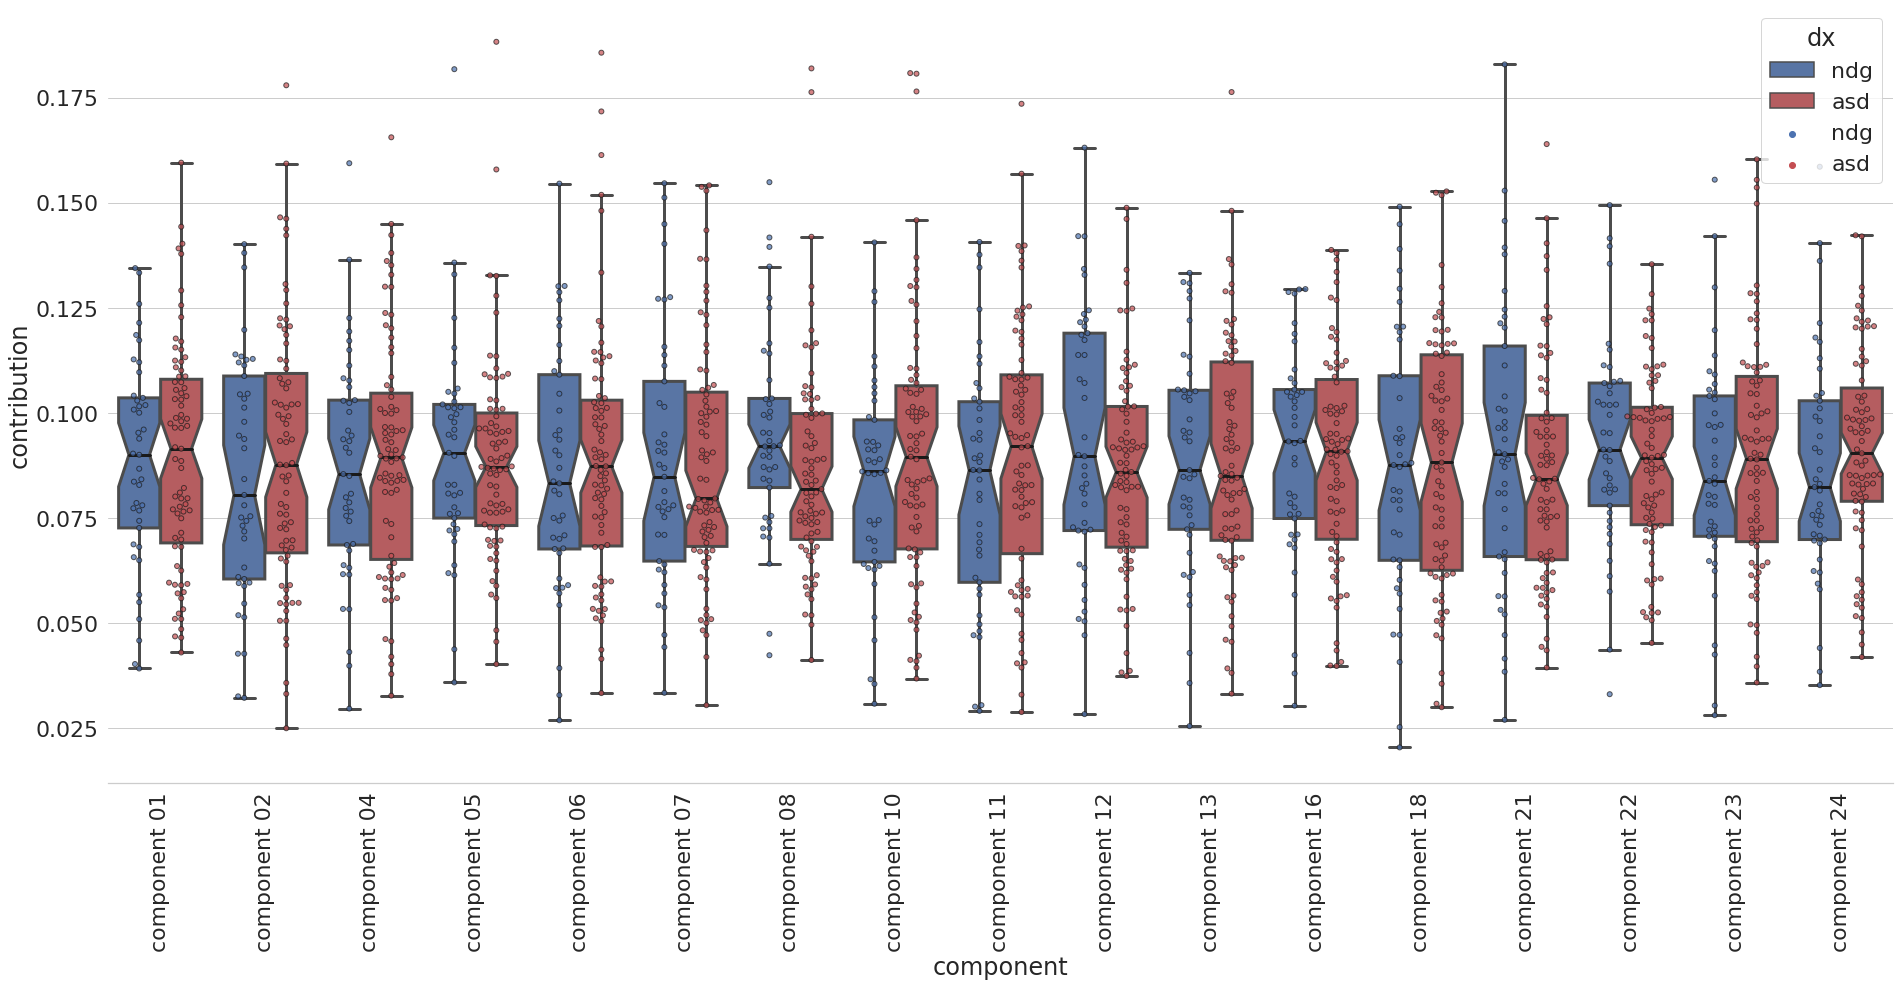

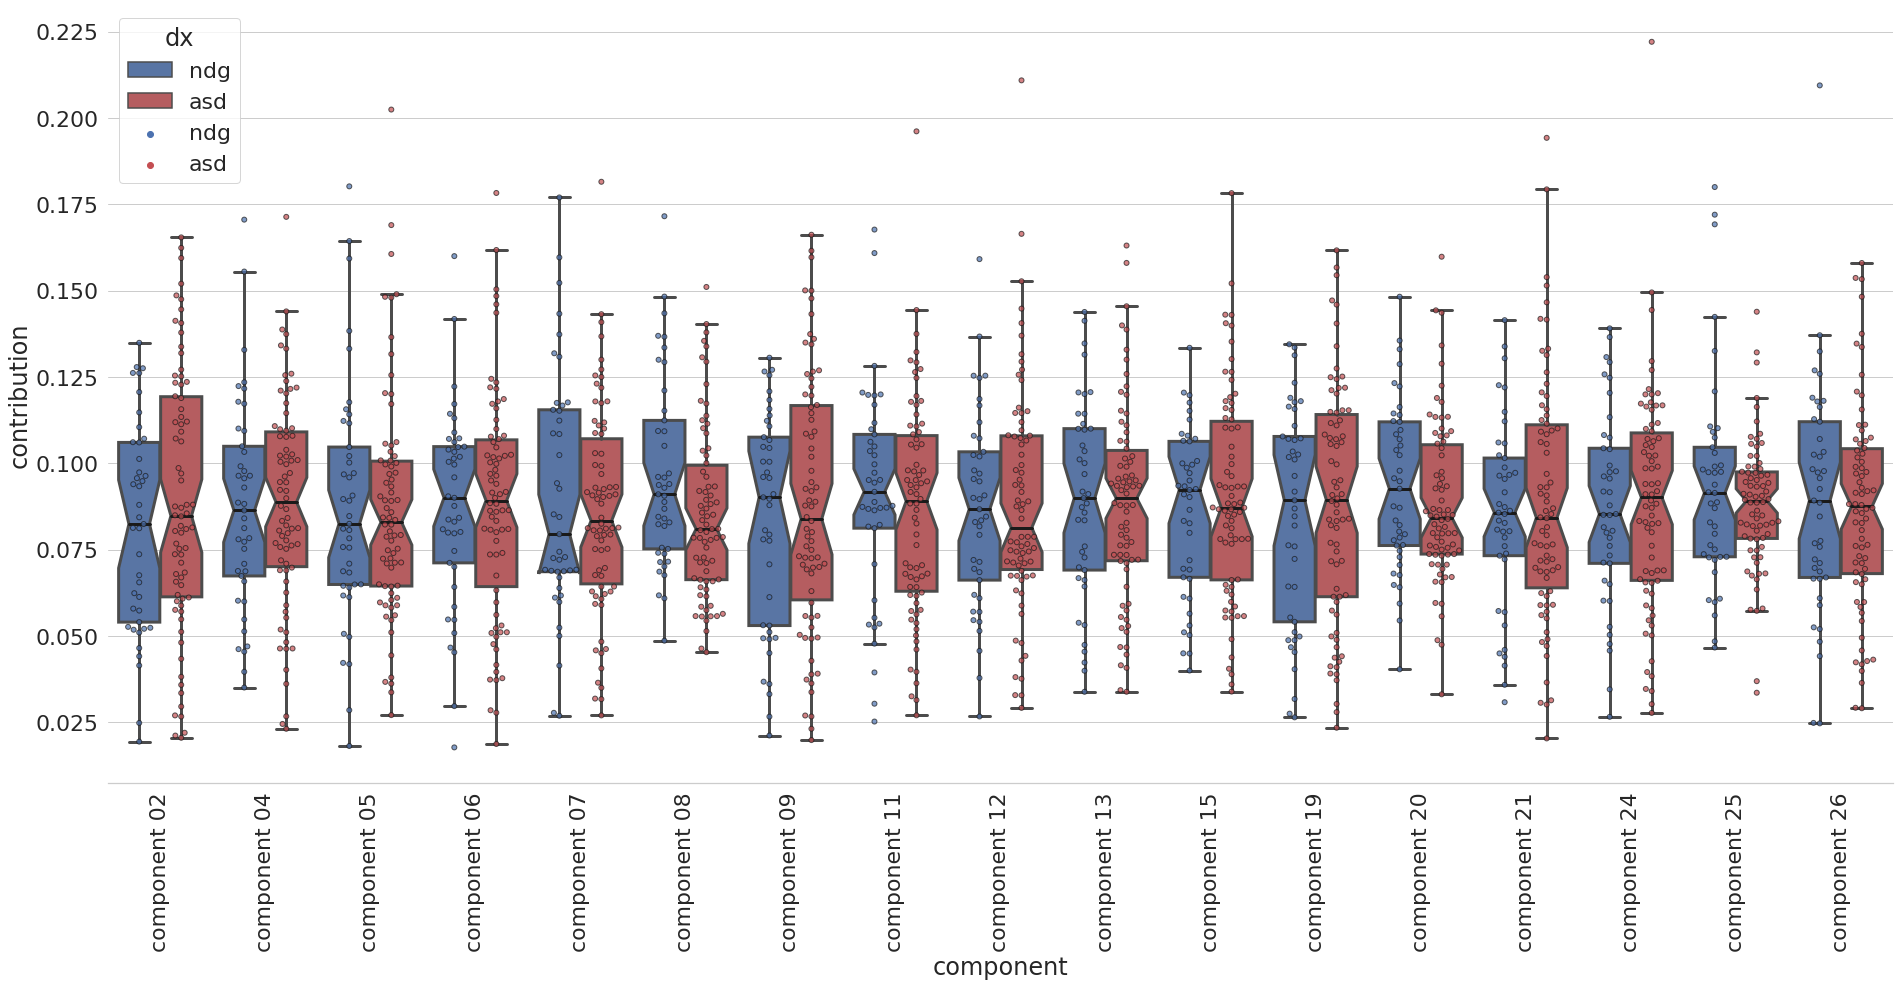

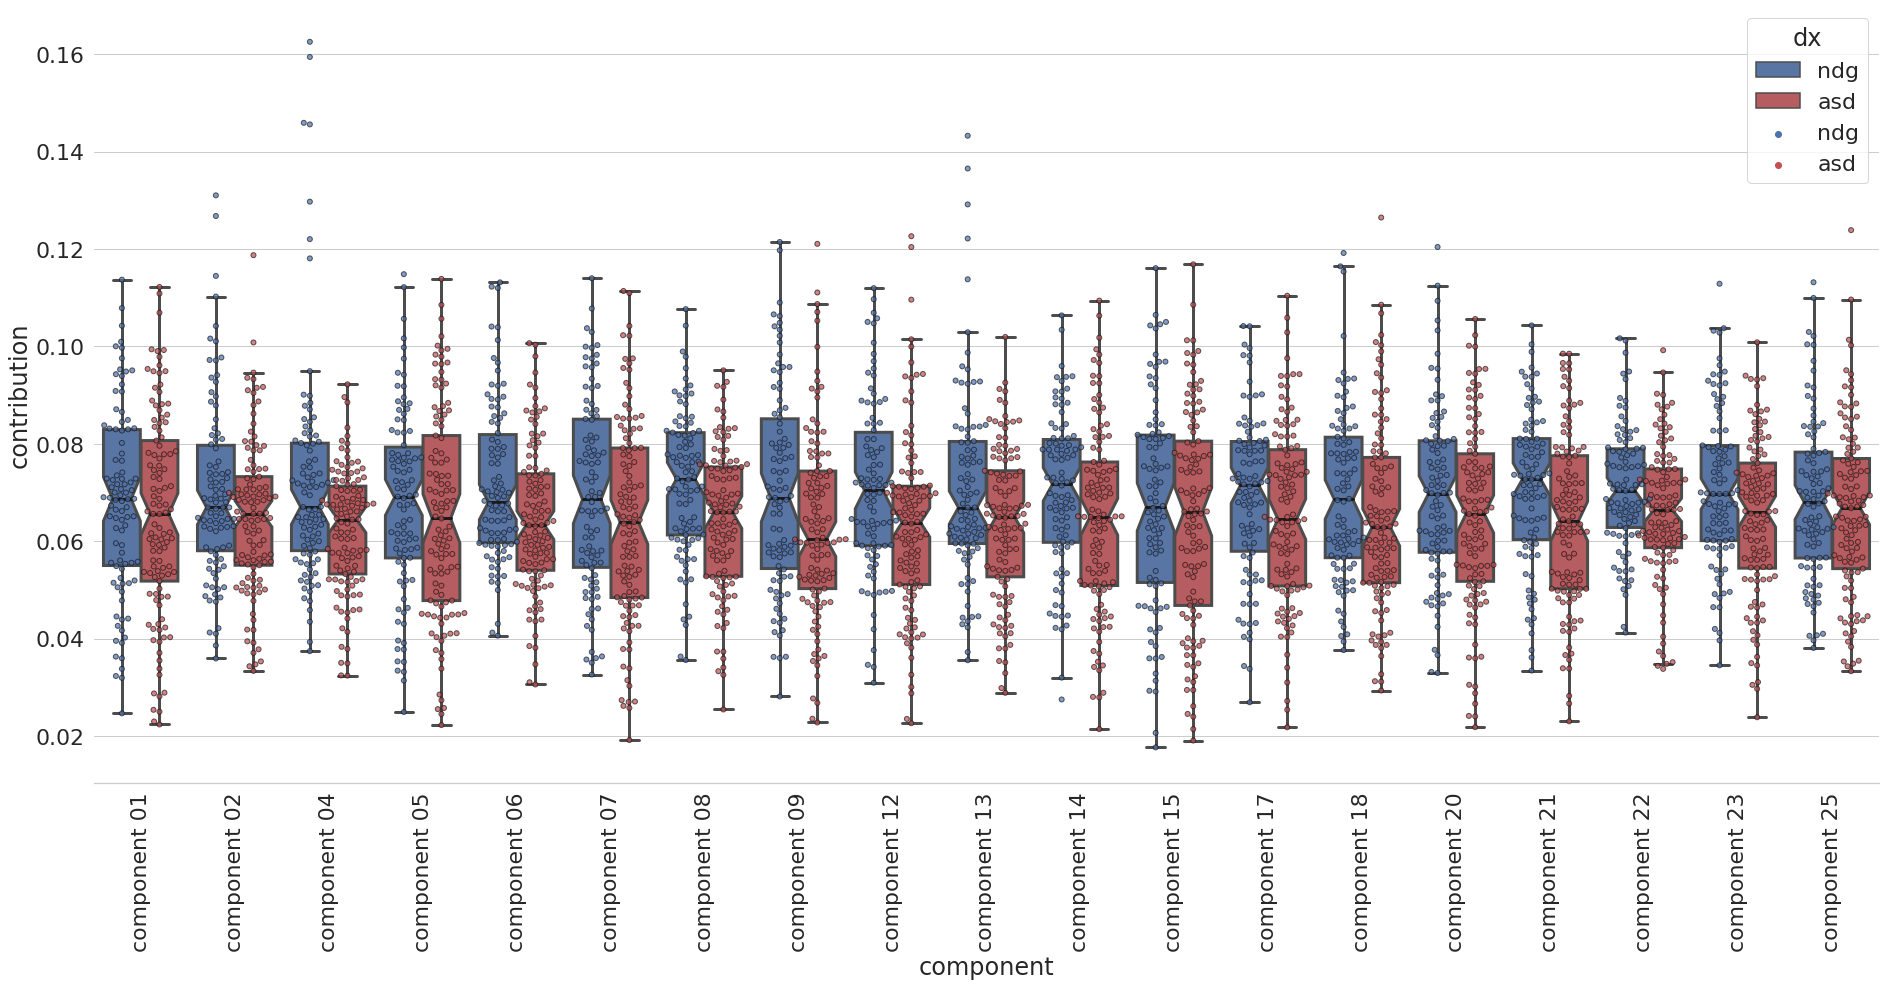

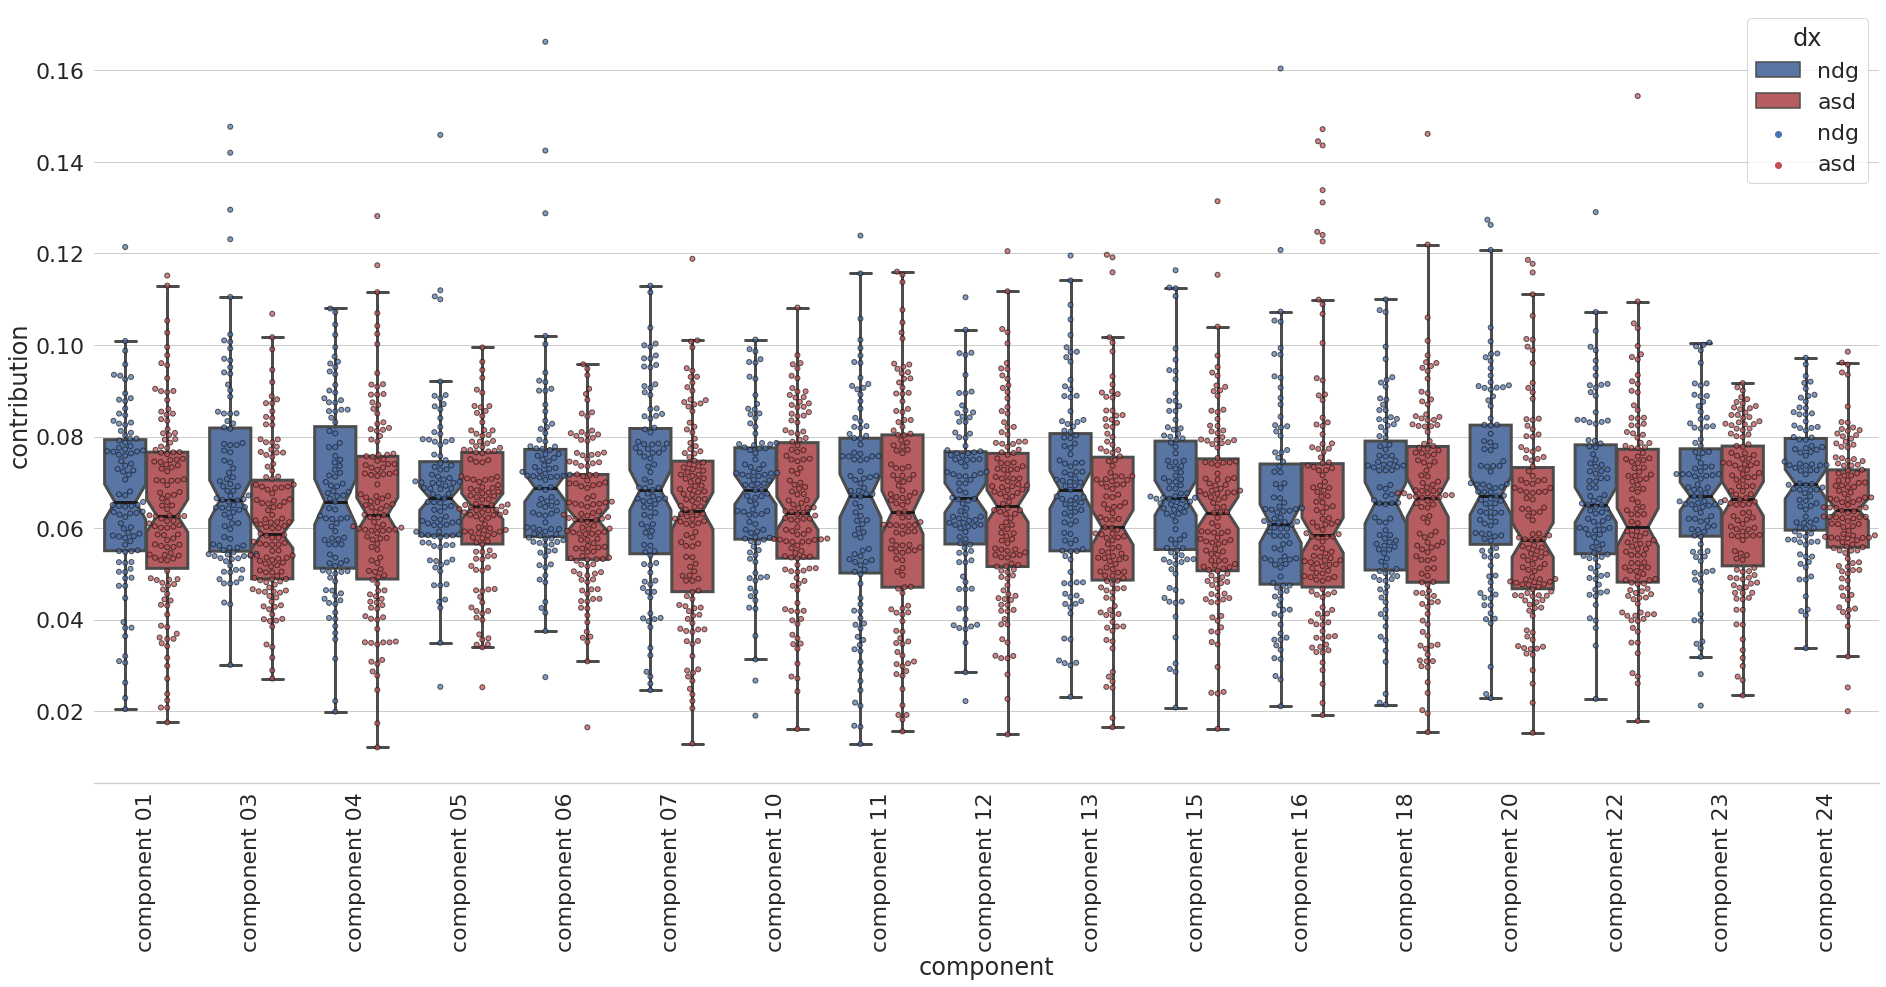

In [38]:
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]
    
    
    dx_list = [0 if x == 'ndg' else 1 if x == 'asd' else x for x in y]

    asc_ind=np.nonzero(dx_list)[0]
    td_ind=indices = [i for i, x in enumerate(dx_list) if x == 0]

    t_list=[]
    p_list=[]
    for component in component_list:
        i=component-1
        asc_contributions = contributions[:,i][asc_ind]
        td_contributions = contributions[:,i][td_ind]
        t,p=ttest_ind(asc_contributions, td_contributions)
        t_list.append(t)
        p_list.append(p)
    #bonferroni fwer correction
    p_bonferroni=[]
    sig_list=[]
    for i,p in enumerate(p_list):
        p_corrected=p*len(component_list)
        p_bonferroni.append(p_corrected)
        if p_corrected < 0.05:
            sig_list.append(i)
    column_list=[]
    for i in component_list:
        column_list.append(f'component {i:02d}')
    # df = pd.DataFrame(contributions_rest, columns=column_list)
    arr_df = pd.DataFrame(X, columns=[f'component {i:02d}' for i in component_list])

    # Concatenate the two DataFrames along the columns axis
    df = pd.concat([demos, arr_df], axis=1)

    df=pd.melt(df, id_vars=['subject','dx','age'], value_vars=column_list, var_name='component', value_name='contribution')

    plt.rcParams['figure.dpi'] = 72
    plt.rcParams['savefig.dpi'] = 72
    plt.figure(figsize=(32,14))
    
    sns.set_theme(style="whitegrid")
    sns.set_context("notebook", font_scale=2)
    
    # Draw a nested violinplot and split the violins for easier comparison
    # violinplot=sns.catplot(data=df, x="component", y="contribution", hue="dx",
    #                kind="swarm", palette={"ndg": "b", "asd": "r"},height=10,aspect=2)
    
    
    sns.boxplot(data=df, x="component", y="contribution", hue="dx",linewidth=3,
                   palette={"ndg": "b", "asd": "r"}, medianprops={"color": "k"}, showfliers = False, dodge = True,notch=True)


    sns.swarmplot(data=df, x="component", y="contribution", hue="dx",edgecolor="k",
                   palette={"ndg": "b", "asd": "r"},linewidth=1,dodge=True, alpha=0.7)
    sns.despine(left=True)
    plt.xticks(rotation=90)


    #p_values = df.groupby(['component'])['contribution'].median()
    vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

    # for xtick in violinplot.get_xticks():
    #     violinplot.text(xtick,-0.015 + vertical_offset, f'p={round(p_list[xtick],4)}', 
    #             horizontalalignment='center',size='x-small',color='k',weight='semibold')
    # for xtick in sig_list:
    #     violinplot.text(xtick,0.0 + vertical_offset, f'*', 
    #             horizontalalignment='center',size='x-large',color='k',weight='bold')

    violinplot.set(title=f'{task} Subject Contributions by Diagnostic Status')
    
    plt.savefig(f'../outputs/figures/results/clinical/{task}_swarm_box_combi.png',bbox_inches='tight')


## print movieTP labelled

In [3]:
task='movieTP'
print(f'~-~-~- {task} -~-~-~')
O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
component_list=nascar_utility.load_components_list(task)
demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
y=demos['dx'].to_numpy()
sex=demos['sex'].to_numpy()
X=contributions[:,[c-1 for c in component_list]]


dx_list = [0 if x == 'ndg' else 1 if x == 'asd' else x for x in y]

asc_ind=np.nonzero(dx_list)[0]
td_ind=indices = [i for i, x in enumerate(dx_list) if x == 0]

t_list=[]
p_list=[]
for component in component_list_ordered:
    i=component-1
    asc_contributions = contributions[:,i][asc_ind]
    td_contributions = contributions[:,i][td_ind]
    t,p=ttest_ind(asc_contributions, td_contributions)
    t_list.append(t)
    p_list.append(p)
#bonferroni fwer correction
p_bonferroni=[]
sig_list=[]
for i,p in enumerate(p_list):
    p_corrected=p*len(component_list)
    p_bonferroni.append(p_corrected)
    if p_corrected < 0.05:
        sig_list.append(i)
column_list=[]
for i_ind,i in enumerate(component_list_ordered):
    column_list.append(f'component {i:02d} {labelled_components[i_ind][1]}')
# df = pd.DataFrame(contributions_rest, columns=column_list)
arr_df = pd.DataFrame(X, columns=[f'component {i:02d} {labelled_components[i_ind][1]}' for i_ind,i in enumerate(component_list_ordered)])

# Concatenate the two DataFrames along the columns axis
df = pd.concat([demos, arr_df], axis=1)

df=pd.melt(df, id_vars=['subject','dx','age'], value_vars=column_list, var_name='component', value_name='contribution')


plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 72
plt.figure(figsize=(16,7))

sns.set_theme(style="whitegrid")
#sns.set(font_scale=2)
# Draw a nested violinplot and split the violins for easier comparison
violinplot=sns.violinplot(data=df, x="component", y="contribution", hue="dx",
               split=True, inner="quart", linewidth=1.5, palette={"ndg": "b", "asd": "r"})
sns.despine(left=True)
plt.xticks(rotation=90)


#p_values = df.groupby(['component'])['contribution'].median()
vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

for xtick in violinplot.get_xticks():
    violinplot.text(xtick,-0.015 + vertical_offset, f'p={round(p_list[xtick],4)}', 
            horizontalalignment='center',size='x-small',color='k',weight='semibold')
for xtick in sig_list:
    violinplot.text(xtick,0.0 + vertical_offset, f'*', 
            horizontalalignment='center',size='large',color='k',weight='semibold')

violinplot.set(title=f'{task} Subject Contributions by Diagnostic Status')

~-~-~- movieTP -~-~-~


NameError: name 'component_list_ordered' is not defined

In [3]:
component_list_ordered=[5, 20, 1, 4, 3, 24, 10, 23, 7, 13, 6, 22, 16, 12, 18, 15, 11]

In [4]:
component_list_ordered

[5, 20, 1, 4, 3, 24, 10, 23, 7, 13, 6, 22, 16, 12, 18, 15, 11]

In [ ]:
labelled_components[

In [5]:
labelled_components=[(1, 'VN Ventral', -1),
 (4, 'Language', -1),
 (2, 'DMN 2', -1),
 (18, 'DAN', -1),
 (8, 'GS', 1),
 (16, 'VN 2', 1),
 (13, 'Language', 1),
 (6, 'VN', 1),
 (11, 'FPN', 1),
 (12, 'SMN', 1),
 (5, 'SMN', 1),
 (10, 'DMN 3', 1),
 (7, 'SMN', -1),
 (22, 'VN', 1),
 (23, 'Ventral-Multimodal',1 ),
 (24, 'GS', 1),
 (21, 'DAN', -1)]

In [160]:
#task='rest_run-1'


In [163]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# skf = StratifiedKFold(n_splits=10)
# skf.get_n_splits(X, y)

# print(skf)


In [365]:
X.shape

(217, 17)

In [404]:

X.shape

(9, 17)

In [408]:
outliers.shape

(116,)

## run classifier with all subjects

In [413]:
classifier_list =[ DecisionTreeClassifier(), 
                  SVC(),
                  BalancedBaggingClassifier(sampler=SMOTE()), 
                  BalancedRandomForestClassifier(n_estimators=50),
                 RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R'),
                 BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                            sampling_strategy='auto',
                            replacement=False,
                            random_state=0),
                 LogisticRegression()]



task='movieDM'
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]

    ### remove outliers
    
    z = np.abs(stats.zscore(X))
    outliers = np.where(z > 3, 1, 0)
    outliers=np.sum(outliers,axis=1)

    y_out=[]
    sex_out=[]
    X_out=[]
    for i,o in enumerate(outliers):
        if o < 1:
            X_out.append(X[i,:])
            y_out.append(y[i])
            sex_out.append(sex[i])
    y=np.asanyarray(y_out)
    sex=np.asanyarray(sex_out)
    X=np.asanyarray(X_out)

    print(f'n={y.shape[0]}')
    for classifier in classifier_list:

        pipe = make_pipeline(StandardScaler(), classifier)
        #pipe = make_pipeline(classifier)
        cv_results = cross_validate(pipe, X, y, scoring="balanced_accuracy",cv=10)
        print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}, {classifier}")

~-~-~- rest_run-1 -~-~-~
n=107
0.633 +/- 0.150, DecisionTreeClassifier()
0.493 +/- 0.089, SVC()
0.543 +/- 0.176, BalancedBaggingClassifier(sampler=SMOTE())
0.520 +/- 0.195, BalancedRandomForestClassifier(n_estimators=50)
0.488 +/- 0.192, RUSBoostClassifier(n_estimators=200)
0.553 +/- 0.142, BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)
0.532 +/- 0.150, LogisticRegression()
~-~-~- rest_run-2 -~-~-~
n=104
0.473 +/- 0.113, DecisionTreeClassifier()
0.500 +/- 0.000, SVC()
0.518 +/- 0.109, BalancedBaggingClassifier(sampler=SMOTE())
0.506 +/- 0.148, BalancedRandomForestClassifier(n_estimators=50)
0.421 +/- 0.148, RUSBoostClassifier(n_estimators=200)
0.471 +/- 0.079, BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)
0.478 +/- 0.068, LogisticRegression()
~-~-~- movieDM -~-~-~
n=200
0.555 +/- 0.055, DecisionTreeClassifier()
0.544 +/- 0.104, SVC()
0.588 +/- 0.101, BalancedBaggingClassifier(sampler=SMOTE())
0.542 +/- 0.091, BalancedRandom

## run classifier with half (stratified) subjects

In [313]:


classifier_list =[ DecisionTreeClassifier(), 
                  SVC(),
                  BalancedBaggingClassifier(sampler=SMOTE()), 
                  BalancedRandomForestClassifier(n_estimators=50),
                 RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R'),
                 BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                            sampling_strategy='auto',
                            replacement=False,
                            random_state=0),
                 LogisticRegression()]



task='movieDM'
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    X=contributions[:,[c-1 for c in component_list]]


    skf = StratifiedKFold(n_splits=2)
    skf.get_n_splits(X, y)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_half=X[train_index]
        y_half=y[train_index]

    for classifier in classifier_list:

        pipe = make_pipeline(StandardScaler(), classifier)
        #pipe = make_pipeline(classifier)
        cv_results = cross_validate(pipe, X_half, y_half, scoring="balanced_accuracy",cv=10)

        print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}, {classifier}")


~-~-~- rest_run-1 -~-~-~
0.588 +/- 0.148, DecisionTreeClassifier()
0.446 +/- 0.067, SVC()
0.500 +/- 0.138, BalancedBaggingClassifier(sampler=SMOTE())
0.471 +/- 0.169, BalancedRandomForestClassifier(n_estimators=50)
0.596 +/- 0.129, RUSBoostClassifier(n_estimators=200)
0.354 +/- 0.204, BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)
0.546 +/- 0.186, LogisticRegression()
~-~-~- rest_run-2 -~-~-~
0.662 +/- 0.137, DecisionTreeClassifier()
0.546 +/- 0.121, SVC()
0.617 +/- 0.189, BalancedBaggingClassifier(sampler=SMOTE())
0.633 +/- 0.195, BalancedRandomForestClassifier(n_estimators=50)
0.562 +/- 0.186, RUSBoostClassifier(n_estimators=200)
0.621 +/- 0.148, BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)
0.500 +/- 0.226, LogisticRegression()
~-~-~- movieDM -~-~-~
0.497 +/- 0.145, DecisionTreeClassifier()
0.524 +/- 0.129, SVC()
0.458 +/- 0.114, BalancedBaggingClassifier(sampler=SMOTE())
0.521 +/- 0.105, BalancedRandomForestClassifier(n

## get SRS scores for regression

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict


In [222]:
measures_dir='/nese/mit/group/sig/projects/hbn/phenotype/Parent_Measures/Demographic_Questionnaire_Measures/'

srs_files=['Social_Responsiveness_Scale-2.csv',
'SRS.csv',
'SRS_Pre.csv']

srs_scores=['Identifiers',
 'SRS,SRS_AWR',
 'SRS,SRS_AWR_T',
 'SRS,SRS_COG',
 'SRS,SRS_COG_T',
 'SRS,SRS_COM',
 'SRS,SRS_COM_T',
 'SRS,SRS_DSMRRB',
 'SRS,SRS_DSMRRB_T',
 'SRS,SRS_MOT',
 'SRS,SRS_MOT_T',
 'SRS,SRS_RRB',
 'SRS,SRS_RRB_T',
 'SRS,SRS_SCI',
 'SRS,SRS_SCI_T',
 'SRS,SRS_Total',
 'SRS,SRS_Total_T']

srs_pre_scores=['Identifiers',
 'SRS_Pre,SRS_AWR',
 'SRS_Pre,SRS_AWR_T',
 'SRS_Pre,SRS_COG',
 'SRS_Pre,SRS_COG_T',
 'SRS_Pre,SRS_COM',
 'SRS_Pre,SRS_COM_T',
 'SRS_Pre,SRS_DSMRRB',
 'SRS_Pre,SRS_DSMRRB_T',
 'SRS_Pre,SRS_MOT',
 'SRS_Pre,SRS_MOT_T',
 'SRS_Pre,SRS_RRB',
 'SRS_Pre,SRS_RRB_T',
 'SRS_Pre,SRS_SCI',
 'SRS_Pre,SRS_SCI_T',
 'SRS_Pre,SRS_Total',
 'SRS_Pre,SRS_Total_T']

dx = pd.read_csv(f'{measures_dir}{srs_files[0]}')
dx = dx[srs_scores]
dx.columns=dx.columns.str.lstrip('SRS,_')

dx2 = pd.read_csv(f'{measures_dir}{srs_files[1]}')
dx2 = dx2[srs_scores]
dx2.columns=dx2.columns.str.lstrip('SRS,_')

dx3 = pd.read_csv(f'{measures_dir}{srs_files[2]}')
dx3 = dx3[srs_pre_scores]
dx3.columns=dx3.columns.str.lstrip('SRS_Pre,SRS_')

dx_all = pd.concat([dx, dx2, dx3])

print(len(dx_all))

In [325]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

~-~-~- rest_run-1 -~-~-~
-3.622 +/- 4.041, LinearRegression()
-2.774 +/- 3.637, Lasso()
-3.284 +/- 3.933, RidgeCV()
-2.755 +/- 3.664, ElasticNet()
~-~-~- rest_run-2 -~-~-~
-3.505 +/- 4.662, LinearRegression()
-2.763 +/- 3.638, Lasso()
-3.158 +/- 4.251, RidgeCV()
-2.711 +/- 3.584, ElasticNet()
~-~-~- movieDM -~-~-~
-1.807 +/- 1.875, LinearRegression()
-1.468 +/- 1.479, Lasso()
-1.670 +/- 1.709, RidgeCV()
-1.491 +/- 1.517, ElasticNet()
~-~-~- movieTP -~-~-~
-1.348 +/- 1.169, LinearRegression()
-1.361 +/- 1.140, Lasso()
-1.296 +/- 1.132, RidgeCV()
-1.315 +/- 1.117, ElasticNet()


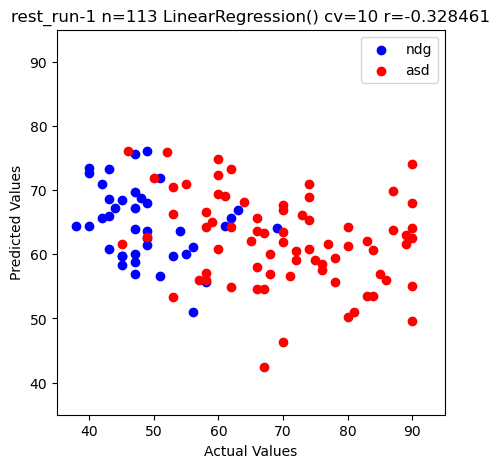

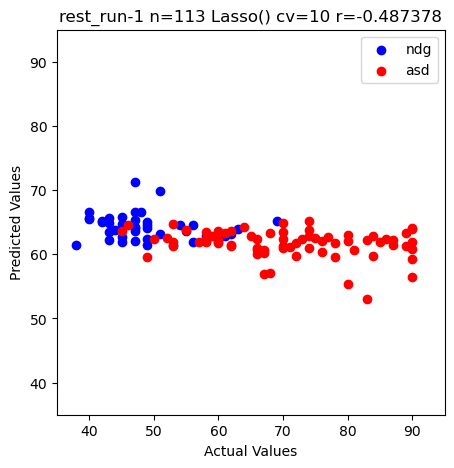

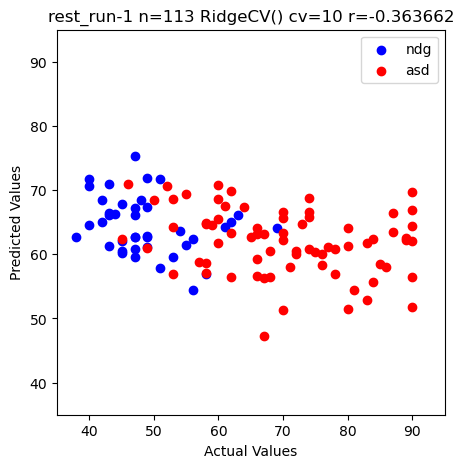

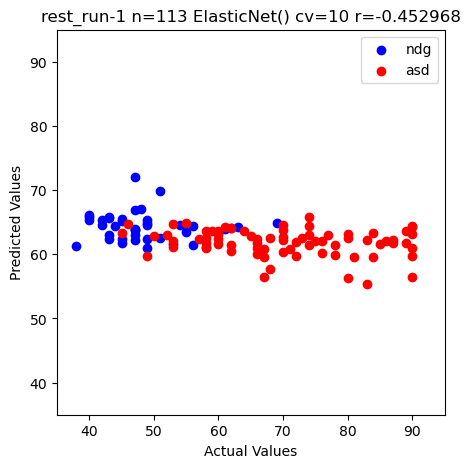

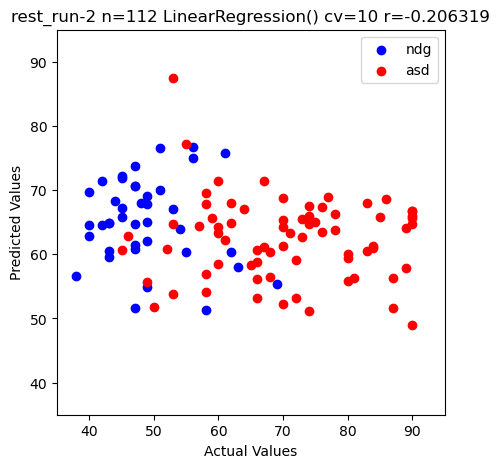

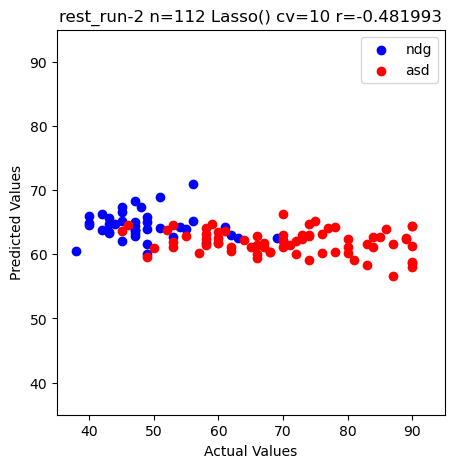

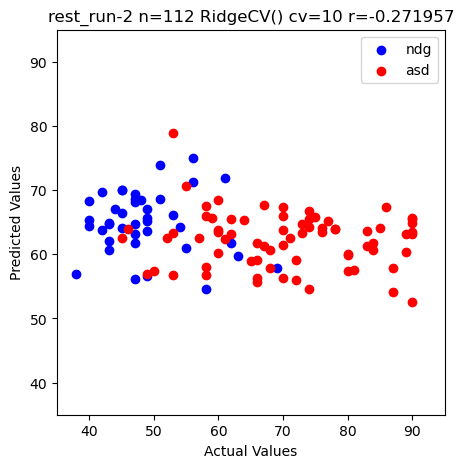

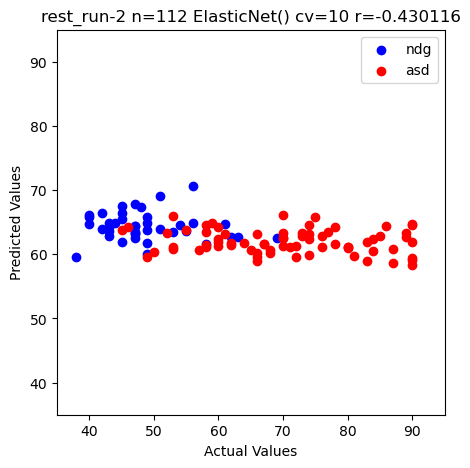

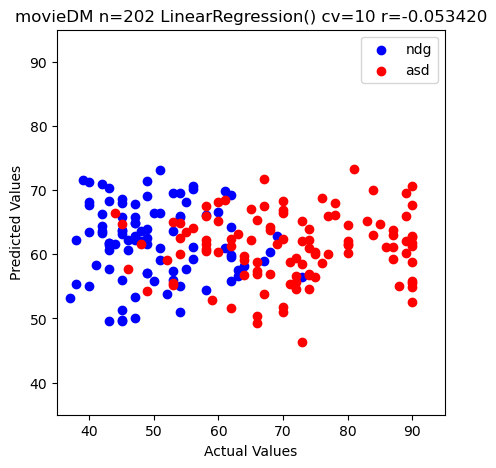

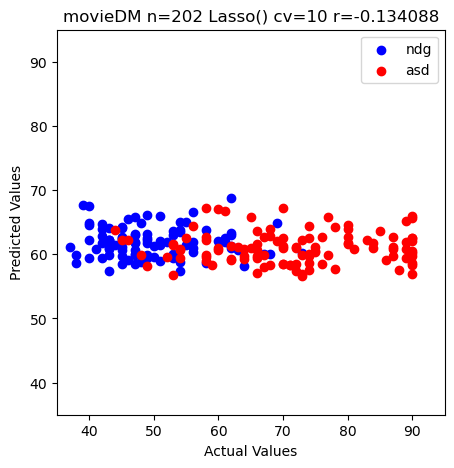

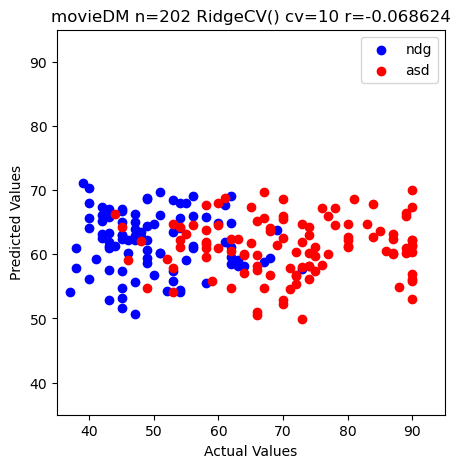

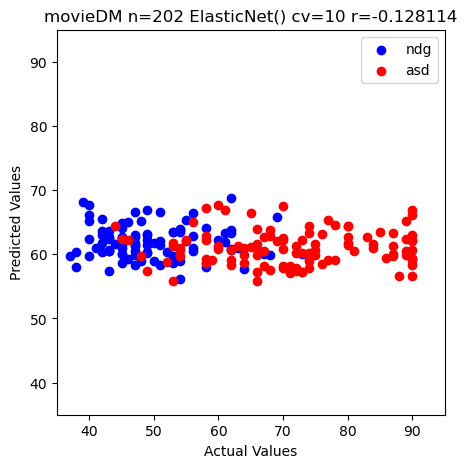

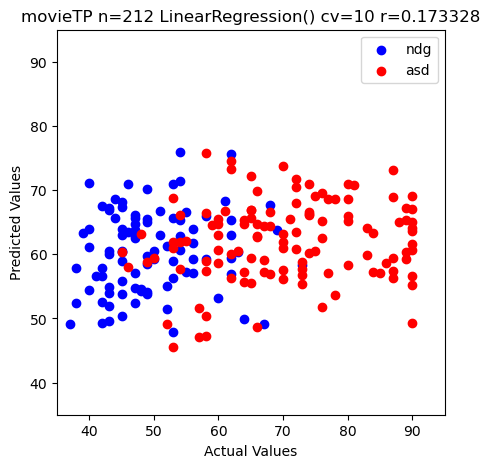

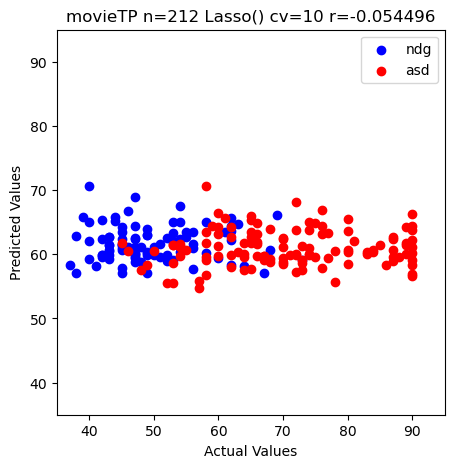

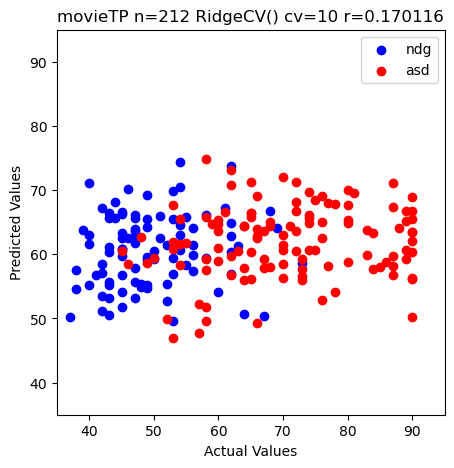

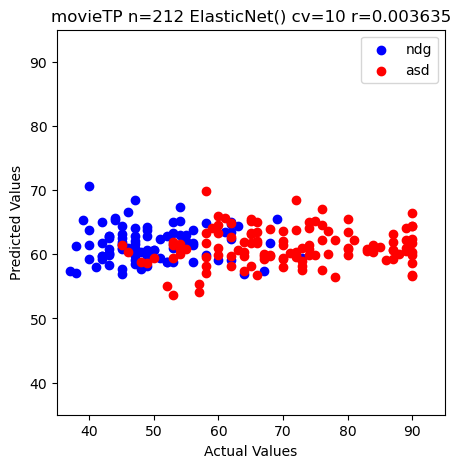

In [340]:
for task in ['rest_run-1','rest_run-2','movieDM','movieTP']:
#for task in ['movieDM']:
    print(f'~-~-~- {task} -~-~-~')
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    component_list=nascar_utility.load_components_list(task)
    demos=pd.read_csv(f'../data/for_matlab/all_ses-HBNsiteRU_task-{task}.csv')
    y=demos['dx'].to_numpy()
    sex=demos['sex'].to_numpy()
    subjects=demos['subject'].to_numpy()
    subjects = [item.replace('sub-', '') for item in subjects]
    X=contributions[:,[c-1 for c in component_list]]
    #load SRS scores if available
    dx_srs=[]
    y_srs=[]
    sex_srs=[]
    X_srs=[]
    for i,s in enumerate(subjects):
        try:
            y_srs.append(  list( dx_all.loc[dx_all['Identifiers'] == s, 'Total_T']  )[-1]  )
            sex_srs.append(sex[i])
            X_srs.append(X[i,:])
            dx_srs.append(y[i])
        except:
            #print(f'{s} dne',list( dx_all.loc[dx_all['Identifiers'] == s, 'Total_T']  ))
            pass
    sex_srs=np.asanyarray(sex_srs)
    X_srs=np.asanyarray(X_srs)
    
    
    #run regression
    #X_srs, y_srs = shuffle(X_srs, y_srs)
    for regressor in [LinearRegression(), Lasso(), RidgeCV(), ElasticNet()]:
    
        pipe = make_pipeline(StandardScaler(), regressor)
                #pipe = make_pipeline(classifier)

        #logistic_regression = LogisticRegression()
        #scores = cross_val_score(pipe, X_srs, y_srs, cv=10)
        scores = cross_validate(pipe, X_srs, y_srs, cv=10,
                            scoring=('r2', 'neg_mean_squared_error'))
        y_pred = cross_val_predict(pipe, X_srs, y_srs, cv=10)

        print(f"{scores['test_r2'].mean():.3f} +/- {scores['test_r2'].std():.3f}, {regressor}")
        #plot results
        ndg= [i for i, x in enumerate(dx_srs) if x == 'ndg']
        asd= [i for i, x in enumerate(dx_srs) if x == 'asd']

        plt.subplots(figsize=(5,5))
        plt.scatter(np.asanyarray(y_srs)[ndg],np.asanyarray(y_pred)[ndg],c='b',label='ndg')
        plt.scatter(np.asanyarray(y_srs)[asd],np.asanyarray(y_pred)[asd],c='r',label='asd')

        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        #ax.set_aspect('equal', 'box')
        plt.title(f'{task} n={sex_srs.shape[0]} {regressor} cv=10 r={np.corrcoef(y_srs,y_pred)[1][0]:01f}')
        plt.xlim([35,95])
        plt.ylim([35,95])
        plt.legend()

array([-12.26005434,  -3.52865346, -10.35983124,  -0.18021459,
        -0.93922647,  -3.74216617,  -0.32264707,  -0.79720573,
        -2.47755971,  -1.61051348])

## wait is SRS correlated with ASD???

In [292]:
dx_all.columns

Index(['Identifiers', 'AWR', 'AWR_T', 'COG', 'COG_T', 'COM', 'COM_T', 'DSMRRB',
       'DSMRRB_T', 'MOT', 'MOT_T', 'B', 'B_T', 'CI', 'CI_T', 'Total',
       'Total_T'],
      dtype='object')

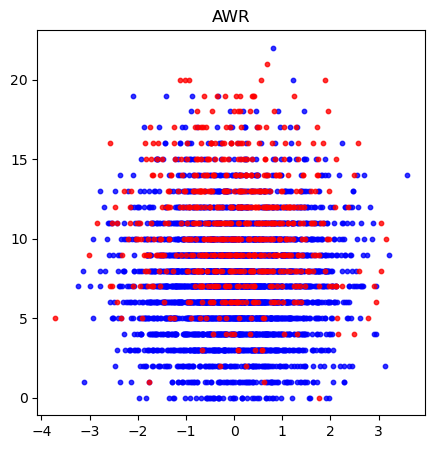

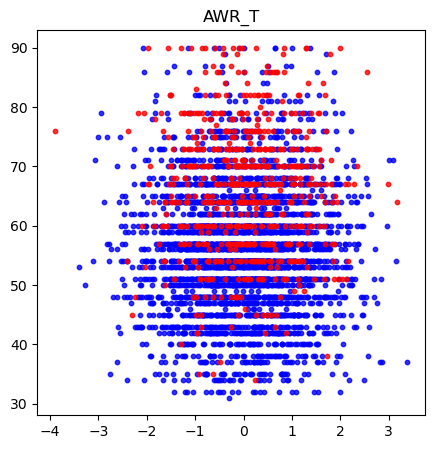

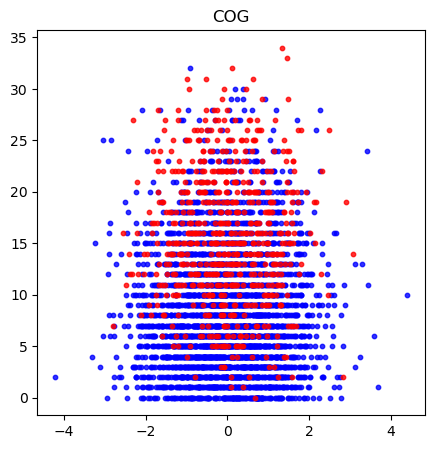

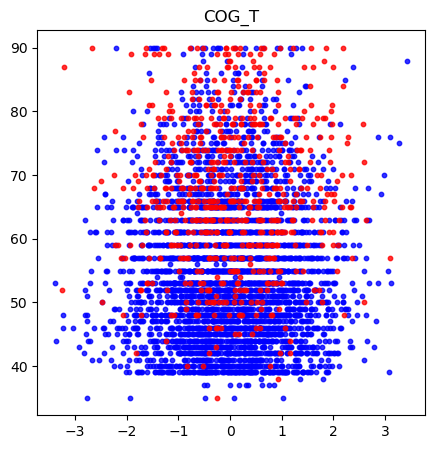

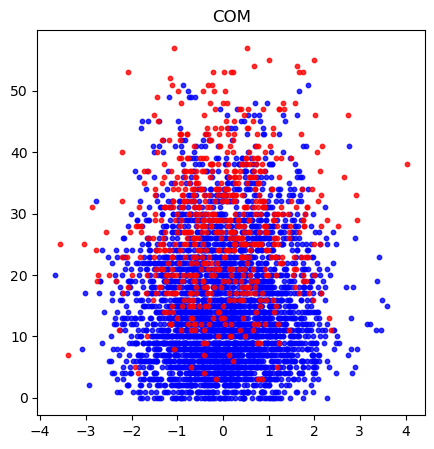

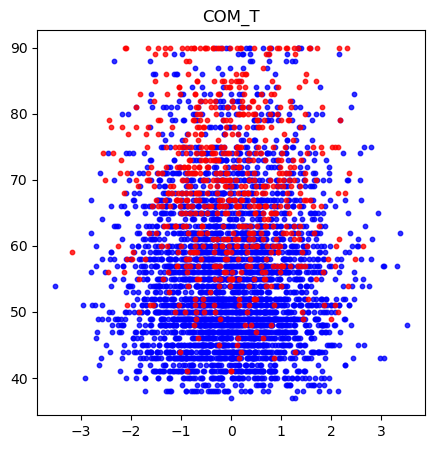

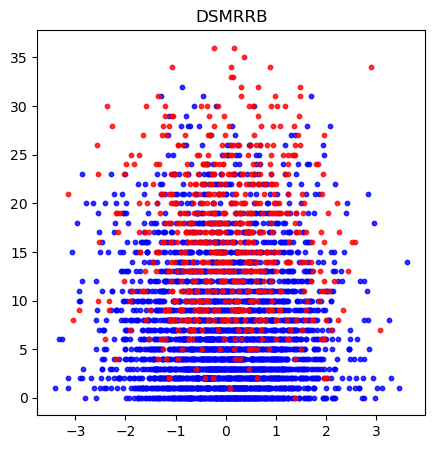

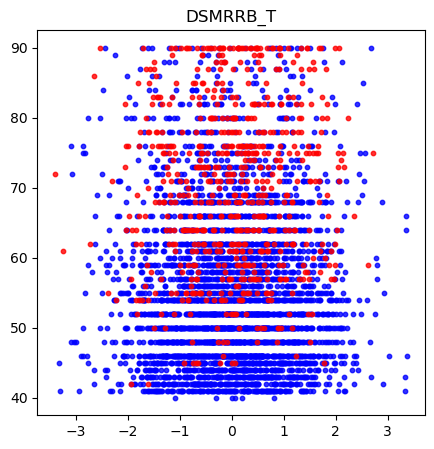

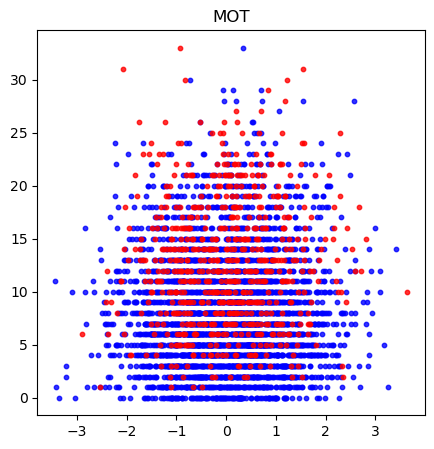

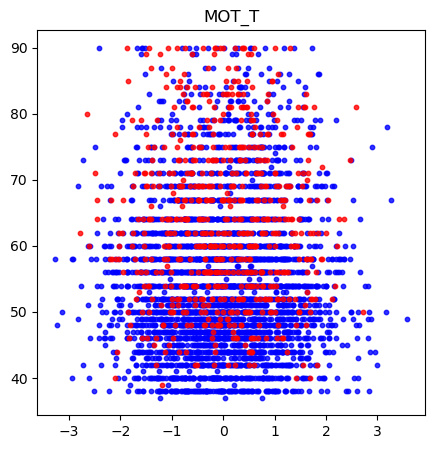

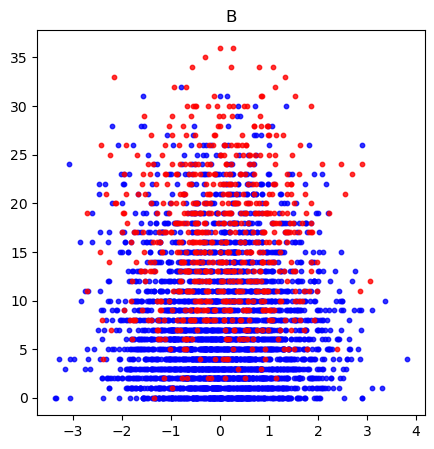

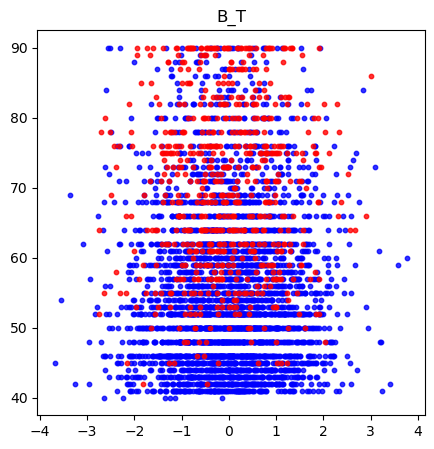

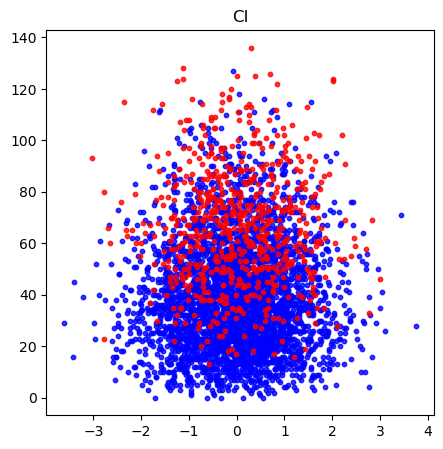

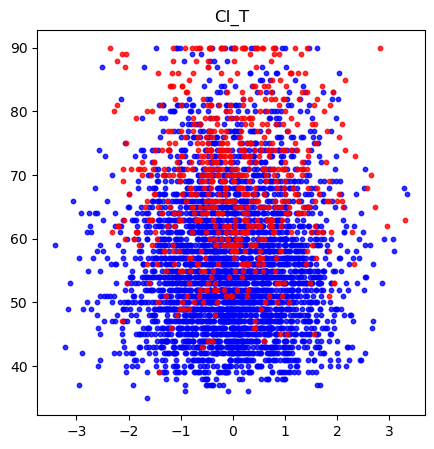

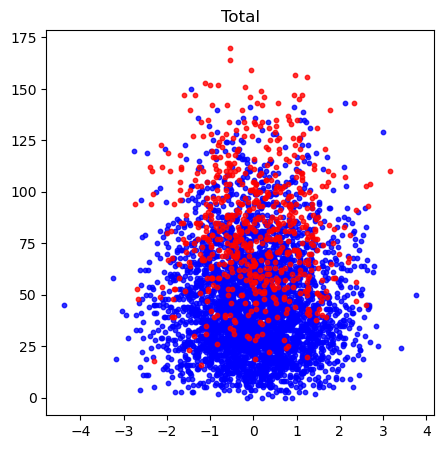

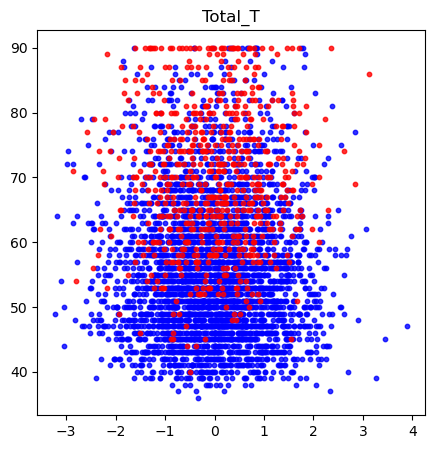

In [293]:
for scale in ['AWR', 'AWR_T', 'COG', 'COG_T', 'COM', 'COM_T', 'DSMRRB',
       'DSMRRB_T', 'MOT', 'MOT_T', 'B', 'B_T', 'CI', 'CI_T', 'Total',
       'Total_T']:
    dx_final=pd.read_csv('../data/phenotype/dx_onehot.csv')

    subjects=dx_final['Identifiers'].to_numpy()
    subjects

    dx_list=[]
    SRS_list=[]
    for s in subjects:
        try:
            SRS_list.append(  list( dx_all.loc[dx_all['Identifiers'] == s, scale]  )[-1]  )
            dx_list.append(  list( dx_final.loc[dx_final['Identifiers'] == s, 'Autism Spectrum Disorder']  )[-1]  )
        except:
            #print(f'{s} dne')
            pass
    dx_list=np.asanyarray(dx_list)
    SRS_list=np.asanyarray(SRS_list)
    ndg= [i for i, x in enumerate(list(dx_list)) if x == 0]
    asd= [i for i, x in enumerate(list(dx_list)) if x == 1]
    plt.subplots(figsize=(5,5))
    plt.scatter(np.random.randn(len(ndg)),SRS_list[ndg],c='b',s=10,alpha=0.8)
    plt.scatter(np.random.randn(len(asd)),SRS_list[asd],c='r',s=10,alpha=0.8)
    plt.title(f'{scale}')